# Bharat Intern 

### Task 2 

## Titanic Classification 

Submitted by 

Gautham V A

**Titanic Classification**

Make a system which tells whether the person will be
save from sinking. What factors were
most likely lead to success-socio-economic
status, age, gender and more.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [104]:
# Importing dataset

train_data=pd.read_csv("C:/Users/HP/Downloads/train.csv")

test_data=pd.read_csv("C:/Users/HP/Downloads/test.csv")

In [105]:
# EDA and preprocessing of training data


train_data.head(n=11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [106]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
# checking null value

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [109]:
# Filling missing values in age with the median of the variable

train_data['Age'].fillna(train_data['Age'].median(),inplace=True)

In [110]:
train_data['Age'].isnull().sum()

0

In [111]:
# Filling missing value in Cabin with mode

train_data['Cabin'].fillna(train_data['Cabin'].mode()[0],inplace=True)

In [112]:
train_data['Cabin'].isnull().sum()

0

In [113]:
# Filling the missing values in Embarked using mode

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

In [114]:
train_data['Embarked'].isnull().sum()

0

In [115]:
# Visualizing the training dataset

sns.set_style('whitegrid')

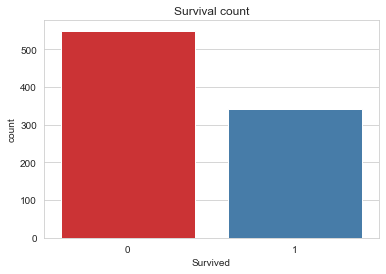

In [116]:
sns.countplot(x='Survived',data=train_data, palette='Set1' )
plt.title('Survival count')
plt.show()

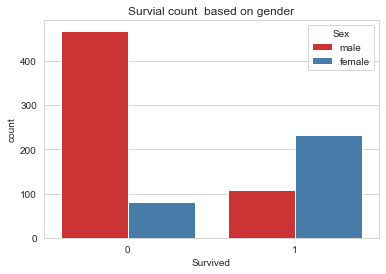

In [117]:
sns.countplot(x='Survived', hue='Sex', data=train_data, palette='Set1')
plt.title('Survial count  based on gender')
plt.show()

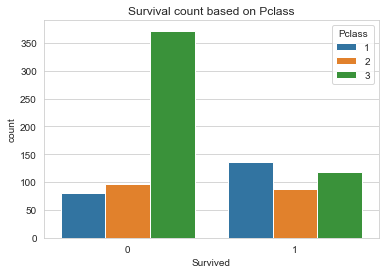

In [118]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)
plt.title('Survival count based on Pclass')
plt.show()

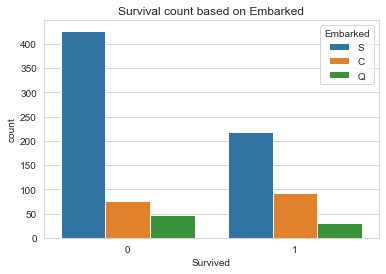

In [119]:
sns.countplot(x='Survived',hue='Embarked',data=train_data)
plt.title('Survival count based on Embarked')
plt.show()

In [120]:
# Feature selection for trainig dataset

features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

x_train=train_data[features]
y_train=train_data['Survived']

We do all the EDA, preprocessing and feature selection for trainig dataset

In [121]:
# EDA and preprocessing for test data

In [122]:
test_data.head(n=11)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [123]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [124]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [125]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [126]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

In [127]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [128]:
test_data['Cabin'].fillna(test_data['Cabin'].mode()[0],inplace=True)

In [129]:
test_data['Cabin'].isnull().sum()

0

In [130]:
test_data['Fare'].fillna(test_data['Fare'].mode()[0],inplace=True)

In [131]:
test_data['Fare'].isnull().sum()

0

In [132]:
x_test=test_data[features]


In [133]:
# Preprocessing for numeric and categorical features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [134]:
# Pipeline with random Forest classifier 

model=Pipeline(steps=[('preprocessor',preprocessor),('classifier',RandomForestClassifier(random_state=42))])

In [135]:
# fitting the model
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [136]:
y_predicted=model.predict(x_test)

In [137]:
predicted_dataset=pd.DataFrame({'PassengerID':test_data['PassengerId'],'Sex':test_data['Sex'],
                                'Pclass':test_data['Pclass'],'Name':test_data['Name'],
                                'Age':test_data['Age'],
                                'SibSp':test_data['SibSp'],
                                'Parch':test_data['Parch'],
                                'Ticket':test_data['Ticket'],
                                'Fare':test_data['Fare'],
                                'Cabin':test_data['Cabin'],
                                'Embarked':test_data['Embarked']
                                ,'Survived':y_predicted})
predicted_dataset


,PassengerID,Sex,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,male,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q,0
1,893,female,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S,0
2,894,male,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q,0
3,895,male,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S,1
4,896,female,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,male,3,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S,0
414,1306,female,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,C,1
415,1307,male,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S,0
416,1308,male,3,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S,0


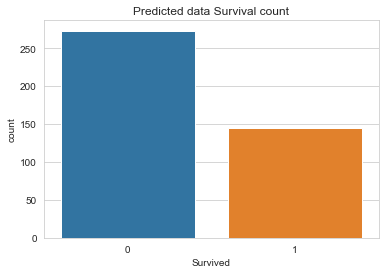

In [138]:
sns.countplot(x='Survived',data=predicted_dataset)
plt.title('Predicted data Survival count')
plt.show()

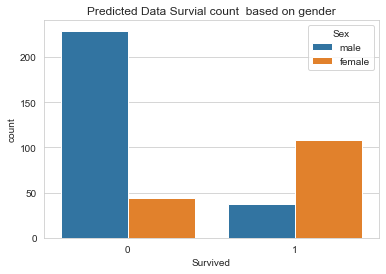

In [139]:
sns.countplot(x='Survived', hue='Sex', data=predicted_dataset)
plt.title('Predicted Data Survial count  based on gender')
plt.show()

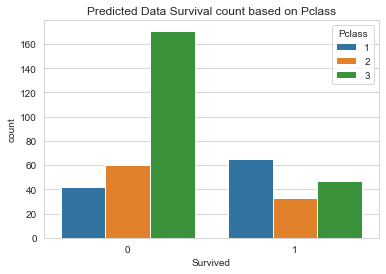

In [140]:
sns.countplot(x='Survived',hue='Pclass',data=predicted_dataset)
plt.title('Predicted Data Survival count based on Pclass')
plt.show()

**Conclusion**

In this Titanic Classification task , we aimed to predict whether passenger would survive the sinking of titanic based on various factor such as socio-ecnomic status,age,gender and more.


We impoerted the training and testing data containing passenger information.We performed an initial exploration of training datato understand its structure and characteristics.This included examining summary statistics, checking for missing values, and creating visualizations to better understand the data.We created visualizations to gain insights into the data, such as survival counts, survival based on gender, passenger class (Pclass), and port of embarkation (Embarked).

We addressed missing values in the 'Age', 'Cabin', and 'Embarked' columns by filling them with appropriate values (e.g., median, mode). We also performed feature selection and engineering to select relevant features for training the model.

 We used a Random Forest Classifier as our machine learning model and created a data preprocessing pipeline to handle both numeric and categorical features. We then trained the model on the training dataset.We used the trained model to make predictions on the testing dataset, which did not contain the 'Survived' column.
 
 By visualizing the predicted dataset, it's visible that the about 150 people survived, based on gender more than 100 women survived but the survival count of men is less than 50.From the last plot , survival count of class one is higher than other two.